# QUESTION 2 - Calculating the sulfur isotope composition during volcanic degassing

### You are provided with the following information:

1. Initial $\delta^{34}S$ of a melt: 0 $^0/_{00}$
2. S isotope fractionation factor $\alpha(H_{2}S_{gas} - S^{2-}_{melt})$ at 1030 $^{\circ\!\!}$ C and QFM-0.5 (Fiege et al., 2014)
    - For a basalt: $\alpha$ = 1.0099
    - For a rhyolite: $\alpha$ = 1.0050
3. Equations to calculate the S isotopic composition of the melt after S loss:
    - For closed system degassing: $\delta^{34} S_{m\_final}$  = $\delta^{34}S_{m\_init}$ – $(1 – F)$ $\times$ $10^3$ $\times$  $\ln \alpha$
    - For open system degassing: $\delta^{34} S_{m\_final}$  = ($\delta^{34} S_{m\_init}$ + $10^3$) $\times$ $F^{(\alpha-1)}$ - $10^3$
    - Where $F$ is the fraction of S remaining in the melt. $\delta^{34}S_{m\_final}$  is the final (degassed) isotopic composition of the melt, whereas $\delta^{34}S_{m\_init}$ is the initial (before degassing) isotopic composition of the melt. $\alpha$ is the fractionation factor $\alpha(H_{2}S_{gas} - S^{2-}_{melt})$

### Table from Fiege et al., 2014
![image](Fiege_et_al_2014-Table.png)

Fiege A, Holtz F, Shimizu N, Mandeville CW, Behrens H, Knipping JL. Sulfur isotope fractionation between fluid and andesitic melt: An experimental study. Geochimica et Cosmochimica Acta. 2014 Oct 1;142:501-21.

## Assignment
1. Assume constant $fO_{2}$ conditions of QFM-0.5 and constant temperature. Calculate the $\delta^{34}S$ degassing path of a melt as a function of the fraction of S remaining in the melt for a basalt at 1030 $^{\circ\!\!}$ C for both open and closed system degassing. The stepwise decrease of S in the melt is used as a measure of degassing. Plot a figure showing the $\delta^{34}S_{melt}$ in permille versus the fraction of S remaining in the melt (from 0-1).
2. Do the same for rhyolite.
3. Comment on the results for both.

<hr>



## Step 1. Construct a method to calculate $\delta^{34}S$

### 1a. Define necessary constants
Using the values given above (taken from the table from Fiege et al., 2014), define the constant values needed to calculate $\delta^{34}S$.

In [60]:
# import necessary libraries
import numpy as np # numpy library to do some math
import matplotlib.pyplot as plt # matplotlib's pyplot for plotting

# Melt/fO2 fractionation factors
basalt_alpha_H2S_S2 = 1.0099
rhyolite_alpha_H2S_S2 = 1.0050

### 1b. Closed-system degassing method

First, we will construct python methods for closed-system and open-system degassing paths separately. Later, we can combine them into one function. Best practice is to break out each calculation into its own method, which can then be called upon by more complex methods that handle interfacing with the user. For example, a more complex method might allow the user to decide "open" or "closed" system, and the method will call upon a smaller open-system or closed-system calculation defined in another method. That is the approach we will take here.

Also note the use of "doc strings" or blocks of text that document the functionality of each of the methods we create below. These are critical to good programming and help you understand what inputs and outputs the method takes and returns in addition to crucial information about those inputs and outputs such as their units.

In [22]:
def delta34S_closed(delta34_S_initial, fractionation_factor, F):
    """
    Method to calculate the change in S isotope delta34S_melt during
    closed-system degassing of a melt. This returns a single value
    for delta34S_melt given the fraction of S remaining dissolved in
    the melt, where 1 is not at all degassed and 0 is totally degassed.

    Parameters
    ----------
    delta34_S_initial:  float
        Initial value for delta34_S in the melt at the start of the
        degassing in permille.
    
    fractionation_factor:   float
        Fractionation factor, alpha, for alpha(H2S_gas - S2-_melt)
    
    F:  float
        Fraction of S remaining in the melt, where 1 = not at all
        degassed and 0 = totally degassed.

    Returns
    -------
    float
        delta34_S value at a given point along a degassing path
    """
    # note that np.log() is natural log!
    delta34_S_calc = (delta34_S_initial - (1 - F) * 10**3 *
                      np.log(fractionation_factor))

    return delta34_S_calc

### 1c. Open-system degassing method.

Let's do the same thing we did above, where we create a very simple method to calculate the $\delta^{34}S$ of a melt at each degassing step, but for open-system degassing.

In [38]:
def delta34S_open(delta34_S_initial, fractionation_factor, F):
    """
    Method to calculate the change in S isotope delta34S_melt during
    open-system degassing of a melt. This returns a single value for
    delta34S_melt given the fraction of S remaining dissolved in the
    melt, where 1 is not at all degassed and 0 is totally degassed.

    Parameters
    ----------
    delta34_S_initial:  float
        Initial value for delta34_S in the melt at the start of the
        degassing in permille.
    
    fractionation_factor:   float
        Fractionation factor, alpha, for alpha(H2S_gas - S2-_melt)
    
    F:  float
        Fraction of S remaining in the melt, where 1 = not at all
        degassed and 0 = totally degassed.

    Returns
    -------
    float
        delta34_S value at a given point along a degassing path
    """
    delta34_S_calc = ((delta34_S_initial + 10**3) *
                      F**(fractionation_factor-1) - 10**3)

    return delta34_S_calc

### 1d. Degassing calculation.

Now, let's write a method to perform a series of open- or closed-system calcultions as we defined them above, at a series of steps from F=1 (not degassed at all) to F=0 (totally degassed).

In [57]:
def calculate_delta34_S_degassing_path(delta34_S_initial,
                                       fractionation_factor,
                                       system, steps=100):
    """
    Method to calculate the degassing path of S isotope delta34S_melt
    during closed-system degassing of S from a melt. 

    Parameters
    ----------
    delta34_S_initial:  float
        Initial value for delta34_S in the melt at the start of the
        degassing in permille.
    
    fractionation_factor:   float
        Fractionation factor, alpha, for alpha(H2S_gas - S2-_melt)
    
    system: str
        Can be one of "open" for open-system or "closed" for closed-system.
    
    steps:  int
        Number of steps to calculate along the degassing path. 100 steps
        is the default value.

    Returns
    -------
    dict
        Dictionary of values along a degassing path in the form
        {fraction of S in melt: delta34_S in the melt in permille}.
        Fraction of S remaining in the melt is given from 1 to 0,
        where 1 = not at all degassed and 0 = totally degassed.
    """
    # create an array from 1 down to zero
    step_size = 1/steps
    F_array = np.arange(1, 0, -step_size)

    # create an empty dictionary to hold computed values
    degassing_dict = {}

    # create a for loop to perform calculation at each degassing step
    if system == "open":
        for i in F_array:
            delta34_S_value = delta34S_open(delta34_S_initial,
                                            fractionation_factor, i)
            degassing_dict[i] = delta34_S_value
    elif system == "closed":
        for i in F_array:
            delta34_S_value = delta34S_closed(delta34_S_initial,
                                              fractionation_factor, i)
            degassing_dict[i] = delta34_S_value
    else:
        raise ValueError("system variable must be a string, either 'open' or 'closed'.")

    return degassing_dict

## Step 2. Run the calculation for basalt and rhyolite for both open and closed systems.

In [70]:
degassing_path_basalt_open = calculate_delta34_S_degassing_path(0,basalt_alpha_H2S_S2, "open", 100)
degassing_path_basalt_closed = calculate_delta34_S_degassing_path(0, basalt_alpha_H2S_S2, "closed", 100)
degassing_path_rhyolite_open = calculate_delta34_S_degassing_path(0, rhyolite_alpha_H2S_S2, "open", 100)
degassing_path_rhyolite_closed = calculate_delta34_S_degassing_path(0, rhyolite_alpha_H2S_S2, "closed", 100)

## Step 3. Plot up your results.

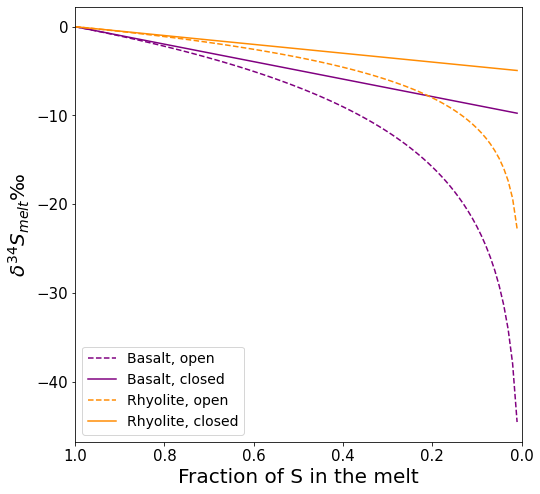

In [92]:
# create a figure and axes with matplotlib
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(0,1)

# define x and y values to plot
x = [F for F in degassing_path_basalt_open.keys()]
y_basalt_open = [delS for delS in degassing_path_basalt_open.values()]
y_basalt_closed = [delS for delS in degassing_path_basalt_closed.values()]
y_rhyolite_open = [delS for delS in degassing_path_rhyolite_open.values()]
y_rhyolite_closed = [delS for delS in degassing_path_rhyolite_closed.values()]

ax.invert_xaxis()

# add axis titles
ax.set_xlabel("Fraction of S in the melt", fontsize=20)
ax.set_ylabel(r"$\delta^{34}S_{melt}$" + u'\u2030', fontsize=20)
ax.tick_params(labelsize=15)

# add linear fits to the plot
ax.plot(x, y_basalt_open, color="#800080", linestyle='dashed', label="Basalt, open")
ax.plot(x, y_basalt_closed, color="#800080", label="Basalt, closed")
ax.plot(x, y_rhyolite_open, color="#FF8C03", linestyle='dashed', label="Rhyolite, open")
ax.plot(x, y_rhyolite_closed, color="#FF8C03", label="Rhyolite, closed")
plt.legend(fontsize=14)

fig.savefig('S_isotope_exercise.png', dpi=400)   # save the figure to file

plt.show()